C:\Users\neosa\AppData\Local\Temp\ipykernel_9188\3544941770.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_df_filtered['Disease'] = 'Asthma'
C:\Users\neosa\AppData\Local\Temp\ipykernel_9188\3544941770.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronchi_df_filtered['Disease'] = 'Bronchiectasis'
C:\Users\neosa\AppData\Local\Temp\ipykernel_9188\3544941770.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.95        24
weighted avg       0.96      0.96      0.96        24

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         6

    accuracy                           0.92        24
   macro avg       0.93      0.93      0.93        24
weighted avg       0.92      0.92      0.92        24

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.00     

C:\Users\neosa\AppData\Local\Temp\ipykernel_9188\3544941770.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')


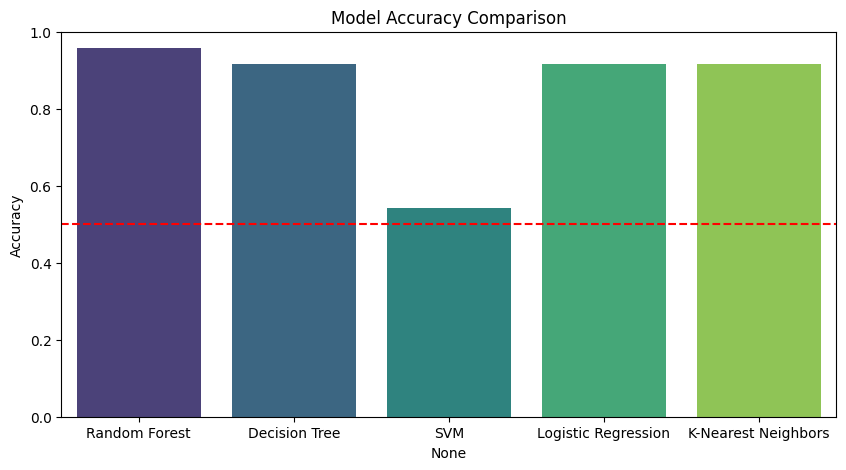


Model Accuracy Results:
                     Accuracy
Random Forest        0.958333
Decision Tree        0.916667
SVM                  0.541667
Logistic Regression  0.916667
K-Nearest Neighbors  0.916667


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

asthma_df = pd.read_csv('asthma.csv')
bronchi_df = pd.read_csv('bronchi.csv')
copd_df = pd.read_csv('copd.csv')
intersection_df = pd.read_csv('intersection.csv')

asthma_df_filtered = asthma_df[asthma_df['IUPAC Name'].isin(intersection_df['IUPAC Name'])]
bronchi_df_filtered = bronchi_df[bronchi_df['IUPAC Name'].isin(intersection_df['IUPAC Name'])]
copd_df_filtered = copd_df[copd_df['IUPAC Name'].isin(intersection_df['IUPAC Name'])]

asthma_df_filtered['Disease'] = 'Asthma'
bronchi_df_filtered['Disease'] = 'Bronchiectasis'
copd_df_filtered['Disease'] = 'COPD'

combined_df = pd.concat([asthma_df_filtered, bronchi_df_filtered, copd_df_filtered], ignore_index=True)

label_encoder = LabelEncoder()
combined_df['Disease'] = label_encoder.fit_transform(combined_df['Disease'])

X = combined_df.drop(['Disease', 'IUPAC Name'], axis=1) 
y = combined_df['Disease']

X.fillna(X.mean(), inplace=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--') 
plt.show()

print("\nModel Accuracy Results:")
print(results_df)
